In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
import numpy as np
from scipy.stats import multivariate_normal
seed=34
def expectation_step(X, pi, mu, cov):
    N, D = X.shape
    K = len(pi)
    resp = np.zeros((N, K))

    for k in range(K):
        resp[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=cov[k])

    # Normalize the responsibilities
    resp_sum = np.sum(resp, axis=1)
    for k in range(K):
        resp[:, k] /= resp_sum

    return resp

def maximization_step(X, resp):
    N, D = X.shape
    K = resp.shape[1]

    # Update pi
    pi = np.sum(resp, axis=0) / N

    # Update mu
    mu = np.zeros((K, D))
    for k in range(K):
        mu[k] = np.sum(resp[:, k].reshape(-1, 1) * X, axis=0) / np.sum(resp[:, k])

    # Update covariance
    cov = np.zeros((K, D, D))
    for k in range(K):
        diff = X - mu[k]
        cov[k] = np.dot(resp[:, k] * diff.T, diff) / np.sum(resp[:, k])

    return pi, mu, cov

def EM(X, K, max_iter=100):
    N, D = X.shape
    np.random.seed(seed)

    # Initialize the parameters
    pi = np.ones(K) / K
    mu = np.random.randn(K, D)
    cov = np.array([np.eye(D) for _ in range(K)])

    # Run EM algorithm
    for i in range(max_iter):
        resp = expectation_step(X, pi, mu, cov)
        pi, mu, cov = maximization_step(X, resp)

    return pi, mu, cov

In [22]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [23]:
data=california_housing.frame
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
data_red=pca.fit_transform(data)
scalar=StandardScaler()
data_rem=scalar.fit_transform(data_red)


In [25]:
df=pd.DataFrame(data_rem)

In [26]:
def predict_clusters(data, pi, mu, sigma):
    posterior_probs = np.zeros((data.shape[0], pi.shape[0]))
    for k in range(pi.shape[0]):
        posterior_probs[:, k] = pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])

    # assign each data point to the cluster with the highest posterior probability
    cluster_labels = np.argmax(posterior_probs, axis=1)

    return cluster_labels


In [27]:
from sklearn.metrics import silhouette_score
score=[]

In [28]:
k_values=[2,3,4]

In [29]:
k=2

print('\n when k is :',k)
pi,mu,var=EM(df, k, max_iter=300)
print('mu values are:',mu)
print('var is :',var)
print('pi is ',pi)
print('*****************************\n')
prediction_k2=predict_clusters(df,pi,mu,var)
sc=silhouette_score(df,prediction_k2)
print('silhietter score is:',sc)
score.append(sc)



 when k is : 2
mu values are: [[ 1.3509222  -0.32226596]
 [-0.25997239  0.06201708]]
var is : [[[ 2.86213956  0.63154218]
  [ 0.63154218  0.91148599]]

 [[ 0.22286048 -0.02163143]
  [-0.02163143  0.99320158]]]
pi is  [0.16138386 0.83861614]
*****************************

silhietter score is: 0.4554871950955174


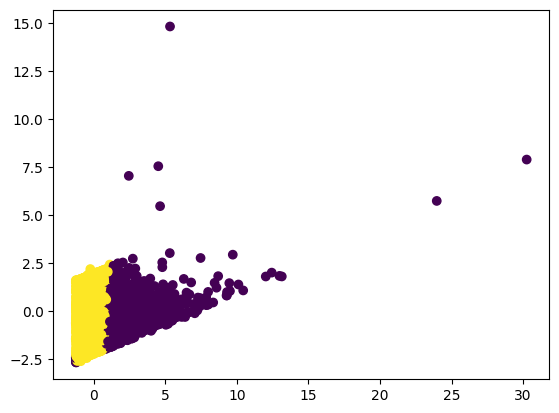

In [30]:
plt.scatter(df[0],df[1],c=prediction_k2)
plt.show()

In [31]:
k=3

print('\n when k is :',k)
pi,mu,var=EM(df, k, max_iter=300)
print('mu values are:',mu)
print('var is :',var)
print('pi is ',pi)
print('*****************************\n')
prediction_k3=predict_clusters(df,pi,mu,var)
sc=silhouette_score(df,prediction_k3)
print('silhietter score is:',sc)
score.append(sc)


 when k is : 3
mu values are: [[ 2.79823258 -0.14675612]
 [-0.38572153  0.29706907]
 [ 0.3543804  -0.53526321]]
var is : [[[5.58928336 1.2600577 ]
  [1.2600577  1.3099315 ]]

 [[0.13989523 0.0170256 ]
  [0.0170256  0.88030335]]

 [[0.57975437 0.26081827]
  [0.26081827 0.72888665]]]
pi is  [0.04358447 0.62274448 0.33367105]
*****************************

silhietter score is: 0.29696955685730814


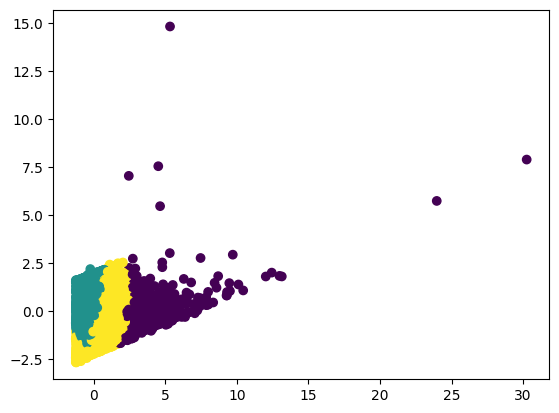

In [32]:
plt.scatter(df[0],df[1],c=prediction_k3)

In [33]:
k=4

print('\n when k is :',k)
pi,mu,var=EM(df, k, max_iter=300)
print('mu values are:',mu)
print('var is :',var)
print('pi is ',pi)
print('*****************************\n')
prediction_k4=predict_clusters(df,pi,mu,var)
sc=silhouette_score(df,prediction_k4)
print('silhietter score is:',sc)
score.append(sc)


 when k is : 4
mu values are: [[ 0.73891838  0.00976234]
 [-0.4004545   0.57514857]
 [-0.22524672 -1.03980949]
 [ 3.48700343  0.15892193]]
var is : [[[ 6.66347534e-01 -1.27522893e-01]
  [-1.27522893e-01  7.24507576e-01]]

 [[ 1.28350337e-01  1.06455002e-03]
  [ 1.06455002e-03  5.40734036e-01]]

 [[ 2.48286440e-01  7.93397220e-02]
  [ 7.93397220e-02  3.05040552e-01]]

 [[ 7.03521434e+00  1.35523548e+00]
  [ 1.35523548e+00  1.59278800e+00]]]
pi is  [0.21797779 0.48228524 0.27291219 0.02682477]
*****************************

silhietter score is: 0.39881623166791763


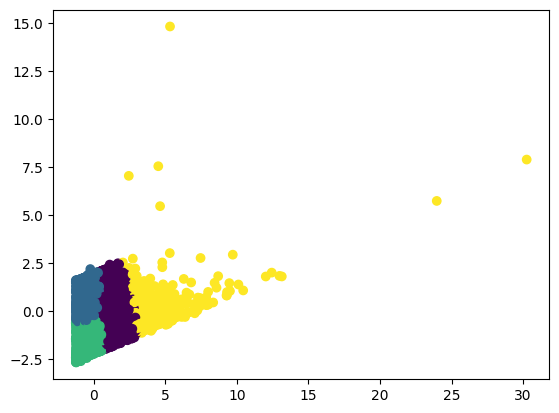

In [34]:
plt.scatter(df[0],df[1],c=prediction_k4)

plt.show()

In [35]:
for i in range(len(k_values)):
  print('when k is ',k_values[i],'score is :',score[i])


when k is  2 score is : 0.4554871950955174
when k is  3 score is : 0.29696955685730814
when k is  4 score is : 0.39881623166791763
